# Phase 4: Reporting and Insights

This notebook presents a comprehensive summary of the data science workflow, key findings, model results, business insights, and recommendations.

## 1. Executive Summary
Summarize the project objectives, approach, and main outcomes.

**Project Objective:** Analyze online retail data to uncover business insights and build predictive models for sales forecasting.

**Approach:** Data cleaning, exploratory analysis, feature engineering, predictive modeling, and reporting.

**Main Outcomes:** Key trends identified, regression model built, actionable recommendations provided.

## 2. Key Data Insights
Highlight important patterns and findings from the EDA and modeling phases.

In [9]:
# Load cleaned data for summary statistics
import pandas as pd
df = pd.read_csv('../Phase_1_Data_Cleaning/cleaned/online_retail_cleaned.csv')
# Show basic stats
print('Number of transactions:', len(df))
print('Unique customers:', df['customer_id'].nunique())
print('Unique products:', df['stockcode'].nunique())
print('Total revenue (£):', df['quantity'].mul(df['price']).sum())

Number of transactions: 797885
Unique customers: 5942
Unique products: 4646
Total revenue (£): 16289991.287999999


### Visual Overview of Sales Distribution

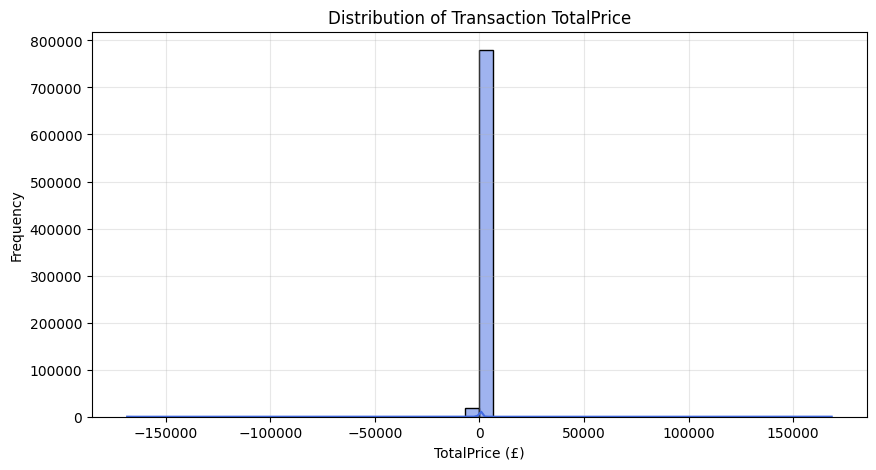

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
df['TotalPrice'] = df['quantity'] * df['price']
plt.figure(figsize=(10,5))
sns.histplot(df['TotalPrice'], bins=50, color='royalblue', kde=True)
plt.title('Distribution of Transaction TotalPrice')
plt.xlabel('TotalPrice (£)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

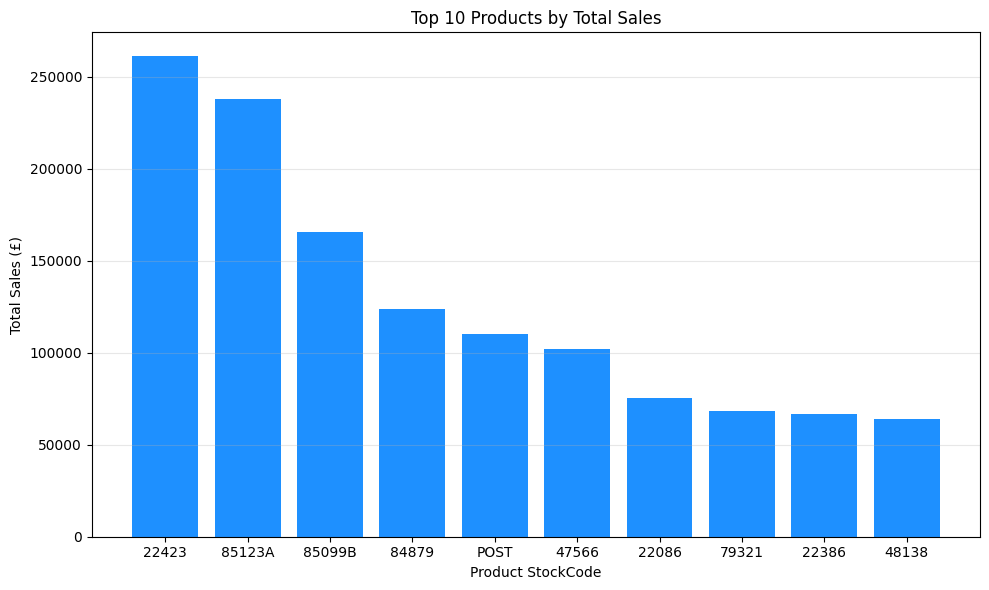

In [11]:
# Top 10 products by total sales (bar chart)
top_products = df.groupby('stockcode')['TotalPrice'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,6))
plt.bar(top_products['stockcode'], top_products['TotalPrice'], color='dodgerblue')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product StockCode')
plt.ylabel('Total Sales (£)')
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

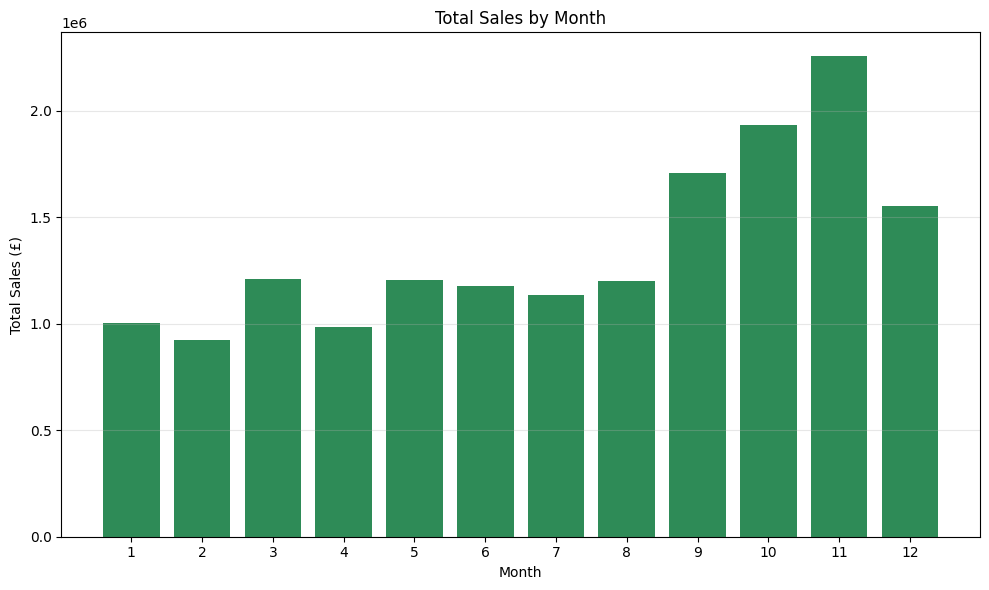

In [12]:
# Monthly sales totals bar chart
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
monthly_sales = df.groupby(df['invoicedate'].dt.month)['TotalPrice'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.bar(monthly_sales['invoicedate'], monthly_sales['TotalPrice'], color='seagreen')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (£)')
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(monthly_sales['invoicedate'])
plt.tight_layout()
plt.show()

## 3. Model Results and Interpretation
Summarize the predictive modeling results and interpret their business relevance.

In [13]:
# Example: Load model results from Phase 3 (if available)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
features = ['quantity', 'price']
X = df[features]
y = df['TotalPrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}')

MSE: 25362.07, MAE: 15.94, R2: 0.56


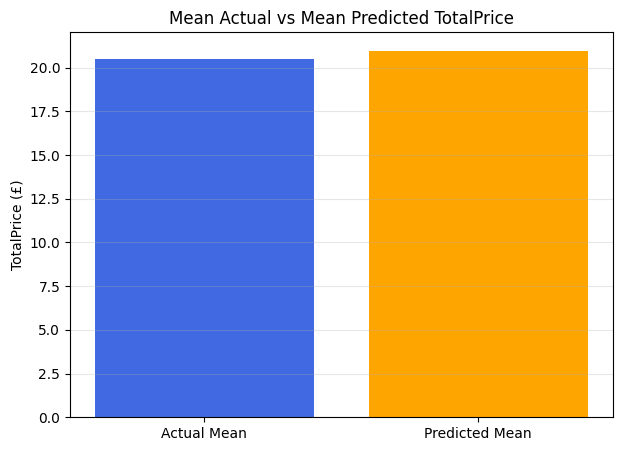

In [14]:
# Compare mean actual vs mean predicted TotalPrice using a bar chart
import numpy as np
mean_actual = np.mean(y_test)
mean_predicted = np.mean(y_pred)
plt.figure(figsize=(7,5))
plt.bar(['Actual Mean', 'Predicted Mean'], [mean_actual, mean_predicted], color=['royalblue', 'orange'])
plt.title('Mean Actual vs Mean Predicted TotalPrice')
plt.ylabel('TotalPrice (£)')
plt.grid(True, axis='y', alpha=0.3)
plt.show()

## 4. Business Recommendations
Present actionable recommendations based on the analysis and model results.

- Focus marketing efforts on top customer segments identified by high spending and frequent purchases.
- Optimize inventory for products with highest sales and revenue.
- Monitor and address negative quantity and price transactions to reduce returns and errors.
- Use predictive modeling to forecast sales and plan promotions during peak months.

## 5. Reflection and Next Steps
Discuss limitations, lessons learned, and future directions.

**Limitations:** Model is based on linear regression and may not capture complex patterns. Data quality issues (e.g., negative prices/quantities) should be further addressed.

**Next Steps:** Explore advanced models, segment customers, and integrate external data for deeper insights.

---

### End of Phase 4: Reporting and Insights
This notebook summarizes the project workflow, findings, and recommendations for business action.